### Ingest EDFacts Graduation Rate Data for 2009

Data sources:  
https://www2.ed.gov/about/inits/ed/edfacts/data-files/acgr-sch-sy2018-19-wide.csv  
https://www2.ed.gov/about/inits/ed/edfacts/data-files/acgr-sch-sy2017-18.csv  
https://www2.ed.gov/about/inits/ed/edfacts/data-files/acgr-sch-sy2016-17.csv  
https://www2.ed.gov/about/inits/ed/edfacts/data-files/acgr-sch-sy2015-16.csv  
https://www2.ed.gov/about/inits/ed/edfacts/data-files/acgr-release2-sch-sy2014-15.csv  
https://www2.ed.gov/about/inits/ed/edfacts/data-files/acgr-sch-sy2013-14.csv  
https://www2.ed.gov/about/inits/ed/edfacts/data-files/acgr-sch-sy2012-13.csv  
https://www2.ed.gov/about/inits/ed/edfacts/data-files/acgr-sch-sy2011-12.csv  
https://www2.ed.gov/about/inits/ed/edfacts/data-files/acgr-sch-sy2010-11.csv  

## What are the features in this data?
* Each instance is a school.

## Graduation rate is given by two features--Cohort and Rate--for each subpopulation below.
* Cohort - Number of students in that subpopulation
* Rate - Percentage (or range of percentage) of students in the cohort graduating with a high school diploma within 4 years

## School identifiers
* STNAM  - State name
* FIPST  - 2 digit code for the state
* LEANM  - School district name
* LEAID  - 7 digit code for school district 
* SCHNAM - School name
* NCESSH - 12 digit school id (only unique identifier for a school)


## Subpopulations
* ALL 	= All students in the school
* MAM 	= American Indian/Alaska   Native students
* MAS 	= Asian/Pacific Islander students
* MHI 	= Hispanic students
* MBL 	= Black students
* MWH 	= White students
* MTR 	= Two or More Races
* CWD 	= Children with Disabilities (IDEA)
* ECD 	= Economically Disadvantaged students
* LEP 	= Limited English Proficient students


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sys
sys.path.append("..")
from ingest import gr
# local_dir = "~/datasets/grad_rate/"
# !ls $local_dir 

In [1]:
# This takes about 2 minutes the first time it is run. Raw data is downloaded and 
# stored in gr_dfs.dat, gr_dfs.bak, and gr_dfs.dir. 
# Calling it a second and future times is much faster.
df = gr.make_clean_grad_rate_frame(2013)
# Set the number formating for the pandas dataframe
pd.set_option('display.float_format', str)
df.style.format("{:.1f}")
df

NameError: name 'gr' is not defined

In [5]:
print(df.ALL_COHORT_1314.describe())
df[df.ALL_COHORT_1314 > 4000]

count              20365.0
mean     173.4590228332924
std     181.67867753449033
min                    6.0
25%                   41.0
50%                  102.0
75%                  262.0
max                 4788.0
Name: ALL_COHORT_1314, dtype: float64


,NCESSCH,STNAM,LEAID,SCHNAM,ALL_COHORT_1314,ALL_RATE_1314
15484,390007903420.0,OHIO,3900079.0,Electronic Classroom Of Tomorrow,4788.0,39.0


In [6]:
print(df.ALL_RATE_1314.describe())

count             20365.0
mean     77.1880432113921
std     21.13660094608904
min                   1.0
25%                  72.0
50%                  85.0
75%                  92.0
max                  99.0
Name: ALL_RATE_1314, dtype: float64


### Questions:
* How many schools are there?  
* How many schools per state?  
* How many schools in the dataset had 5 or less in the cohort?  
* What is the missing value distribution?

In [7]:
# Number of schools per state
df.STNAM.value_counts()

TEXAS                   1612
CALIFORNIA              1595
NEW YORK                1188
MICHIGAN                 998
OHIO                     897
FLORIDA                  844
PENNSYLVANIA             680
ILLINOIS                 675
MINNESOTA                658
NORTH CAROLINA           558
WASHINGTON               554
MISSOURI                 523
WISCONSIN                523
ARIZONA                  501
OKLAHOMA                 458
GEORGIA                  450
COLORADO                 430
NEW JERSEY               414
INDIANA                  401
MASSACHUSETTS            371
ALABAMA                  371
TENNESSEE                365
IOWA                     352
KANSAS                   349
LOUISIANA                347
VIRGINIA                 327
OREGON                   316
KENTUCKY                 310
ARKANSAS                 300
NEBRASKA                 263
MARYLAND                 252
MISSISSIPPI              251
SOUTH CAROLINA           229
IDAHO                    198
CONNECTICUT   

In [8]:
# Number of schools with 5 or fewer students in cohort.
"""
1468
1293
1304
1456
1265
1553
1350
1353
1475
"""
# Commented out because takes about a minute
if False:
    for year in range(2010,2019):
        df = gr.make_raw_gr_frame(year)
        for col in df.columns:
            if col.startswith('ALL_RATE'):
                print(sum(df[col] == 'PS'))

<AxesSubplot: >

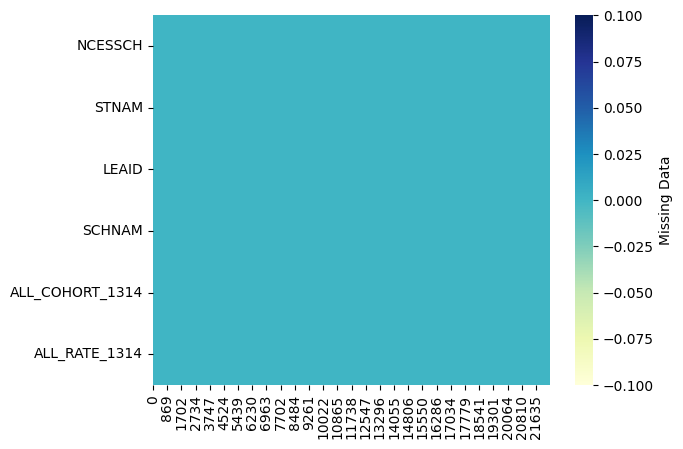

In [9]:
# Visualize missing values
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

In [10]:
# School names are not unique
len(df.SCHNAM) == len(df.SCHNAM.unique())
print(len(df.SCHNAM), len(df.SCHNAM.unique()))

20365 19010


20365 20365


In [12]:
# Are the state and school name unique?
df[['STNAM','SCHNAM']].value_counts()
# NCESSCH 12-digit identifier is unique
print(len(df.NCESSCH), len(df.NCESSCH.unique()))

STNAM       SCHNAM                      
WISCONSIN   West High                       8
            East High                       7
TENNESSEE   Central High School             7
CALIFORNIA  Middle College High             6
MISSOURI    CENTRAL HIGH                    6
                                           ..
KANSAS      Rock Creek Jr/Sr High School    1
            Riverton High                   1
            Riverside High School           1
            Riley County High School        1
WYOMING     Wyoming Indian High School      1
Length: 20011, dtype: int64

In [13]:
# Are the LEAID and school name unique?
df[['LEAID','SCHNAM']].value_counts()

LEAID      SCHNAM                       
400273.0   Student Choice High School       2
400266.0   PACE Preparatory Academy         2
4400024.0  Sheila Skip Nowell Leadership    2
3704720.0  William G Enloe High             1
3704880.0  Charles B Aycock High            1
                                           ..
2007620.0  Hutchinson High School           1
2007590.0  Humboldt High School             1
2007560.0  Hugoton Learning Academy         1
           Hugoton High                     1
5606240.0  Worland High School              1
Length: 20362, dtype: int64